In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import zcode.plot as zplot

In [2]:
def range_around(val, rang):
    hi = np.min([val + rang/2, 1.0])
    diff = val + rang/2 - hi
    lo = np.max([val - rang/2 - diff, 0.0])
    diff = lo - (val - rang/2 - diff)
    hi = np.min([hi+diff, 1.0])
    return [lo, hi]

In [3]:
cc = 'hotpink'
rgb = mpl.colors.to_rgb(cc)
hsv = mpl.colors.rgb_to_hsv(rgb)
print(rgb)
print(hsv)

size = 100
rang = 1.0
loc = 2
my_colors = np.ones((size, 3)) * np.asarray(hsv)[np.newaxis, :]
lo, hi = range_around(hsv[loc], rang)
print(lo, hsv[loc], hi)
my_colors[:, loc] = np.interp(np.linspace(0.0, 1.0, size), [0.0, 1.0], [lo, hi])

my_colors = mpl.colors.hsv_to_rgb(my_colors)

(1.0, 0.4117647058823529, 0.7058823529411765)
[0.91666667 0.58823529 1.        ]
0.0 1.0 1.0


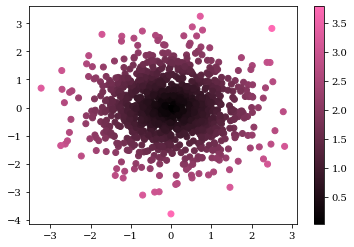

In [4]:
data = np.random.normal(size=(2, 1000))

val = np.linalg.norm(data, axis=0)

# cmap = plt.get_cmap('Reds')
# cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", ['red', 'green', 'blue'])
cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", my_colors)

smap = mpl.cm.ScalarMappable(cmap=cmap)
colors = smap.to_rgba(val)
# colors = cmap(val/val.max())

plt.scatter(*data, color=colors)
plt.colorbar(smap)
plt.show()

0 0 red 0.33 [0. 1. 1.]
0 1 red 0.66 [0. 1. 1.]
0 2 red 1.0 [0. 1. 1.]
1 0 green 0.33 [0.33333333 1.         0.50196078]
1 1 green 0.66 [0.33333333 1.         0.50196078]
1 2 green 1.0 [0.33333333 1.         0.50196078]
2 0 blue 0.33 [0.66666667 1.         1.        ]
2 1 blue 0.66 [0.66666667 1.         1.        ]
2 2 blue 1.0 [0.66666667 1.         1.        ]
3 0 purple 0.33 [0.83333333 1.         0.50196078]
3 1 purple 0.66 [0.83333333 1.         0.50196078]
3 2 purple 1.0 [0.83333333 1.         0.50196078]
4 0 pink 0.33 [0.97089947 0.24705882 1.        ]
4 1 pink 0.66 [0.97089947 0.24705882 1.        ]
4 2 pink 1.0 [0.97089947 0.24705882 1.        ]


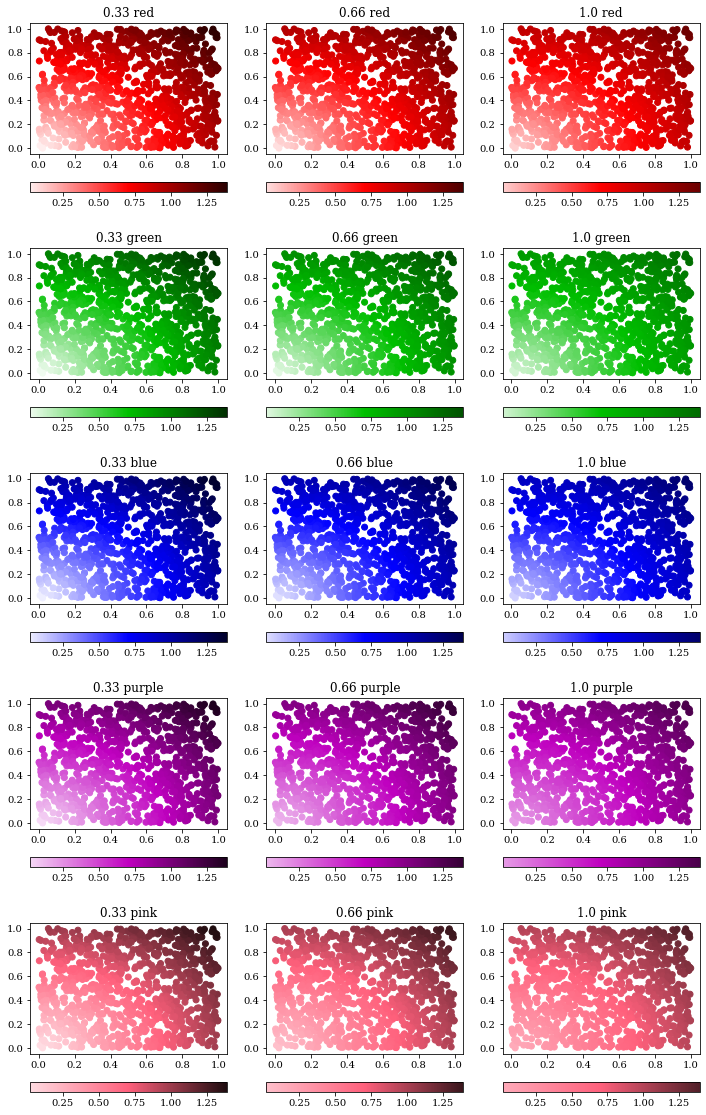

In [5]:
# def color_to_cmap(col, values=[0.2, 1.0], size=5):
#     rgb = mpl.colors.to_rgb(col)        
#     hsv = mpl.colors.rgb_to_hsv(rgb)

#     my_colors = np.ones((size, 3)) * np.asarray(hsv)[np.newaxis, :]
    
#     vv = 2
#     val = hsv[vv]
#     values[0] = np.min([values[0], val])
#     values[1] = np.max([values[1], val])
#     my_colors[:, vv] = np.interp(np.linspace(0.0, 1.0, size), [0.0, 1.0], values)    
        
#     my_colors = mpl.colors.hsv_to_rgb(my_colors)
#     cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", my_colors)
#     return cmap


def inc_sat(col, fac=0.5):
    rgb = mpl.colors.to_rgb(col)
    hsv = mpl.colors.rgb_to_hsv(rgb)
    hsv[1] = np.interp(fac, [0.0, 1.0], [hsv[1], 1.0])
    return mpl.colors.hsv_to_rgb(hsv)
    

def inc_val(col, fac=0.5):
    rgb = mpl.colors.to_rgb(col)
    hsv = mpl.colors.rgb_to_hsv(rgb)
    hsv[2] = np.interp(fac, [0.0, 1.0], [hsv[2], 1.0])
    return mpl.colors.hsv_to_rgb(hsv)
    

def color_to_cmap(col, values=[0.5, 0.5], size=5, pow=0.5, sat=0.5, val=0.5):
    rgb = mpl.colors.to_rgb(col)        
    rgb = inc_val(rgb, val)
    rgb = inc_sat(rgb, sat)
    # lo = mpl.colors.to_rgb('white')
    # hi = mpl.colors.to_rgb('black')
    dw = np.linalg.norm(np.diff(np.vstack([rgb, np.ones_like(rgb)]), axis=0)) / np.sqrt(3)
    db = np.linalg.norm(np.diff(np.vstack([rgb, np.zeros_like(rgb)]), axis=0)) / np.sqrt(3)
    # print(f"{dw=}, {db=}")
    values = np.array([dw, db])**pow
    lo = [np.interp(values[0], [0.0, 1.0], [ll, 1.0]) for ll in rgb]
    hi = [np.interp(values[1], [0.0, 1.0], [ll, 0.0]) for ll in rgb]
#     lo = inc_sat(lo, sat)
#     hi = inc_sat(hi, sat)
    my_colors = [lo, rgb, hi]
    # print(my_colors)
    cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", my_colors)
    return cmap

# data = np.random.normal(size=(2, 1000))
data = np.random.uniform(size=(2, 1000))

val = np.linalg.norm(data, axis=0)



powers = [0.33, 0.66, 1.0]
ax = plt.gca()
# names = [ax._get_lines.get_next_color() for ii in range(5)]
names = ['red', 'green', 'blue', 'purple', 'pink']
plt.close('all')
fig, axes = plt.subplots(figsize=[4*len(powers), 4*len(names)],
                         ncols=len(powers), nrows=len(names), squeeze=False)
for (ii, jj), ax in np.ndenumerate(axes):
    col = names[ii]
    pow = powers[jj]
    print(ii, jj, col, pow, mpl.colors.rgb_to_hsv(mpl.colors.to_rgb(col)))
    cmap = color_to_cmap(col, values=[0.8, 0.1], pow=pow)
    smap = mpl.cm.ScalarMappable(cmap=cmap)
    colors = smap.to_rgba(val)

    ax.set_title(str(pow) + " " + str(col))
    ax.scatter(*data, color=colors)
    plt.colorbar(smap, ax=ax, orientation='horizontal')

plt.show()

0 0 red 0.5 [0. 1. 1.]
0 1 red 1.0 [0. 1. 1.]
0 2 red 2.0 [0. 1. 1.]
1 0 green 0.5 [0.33333333 1.         0.50196078]
1 1 green 1.0 [0.33333333 1.         0.50196078]
1 2 green 2.0 [0.33333333 1.         0.50196078]
2 0 blue 0.5 [0.66666667 1.         1.        ]
2 1 blue 1.0 [0.66666667 1.         1.        ]
2 2 blue 2.0 [0.66666667 1.         1.        ]
3 0 purple 0.5 [0.83333333 1.         0.50196078]
3 1 purple 1.0 [0.83333333 1.         0.50196078]
3 2 purple 2.0 [0.83333333 1.         0.50196078]
4 0 pink 0.5 [0.97089947 0.24705882 1.        ]
4 1 pink 1.0 [0.97089947 0.24705882 1.        ]
4 2 pink 2.0 [0.97089947 0.24705882 1.        ]


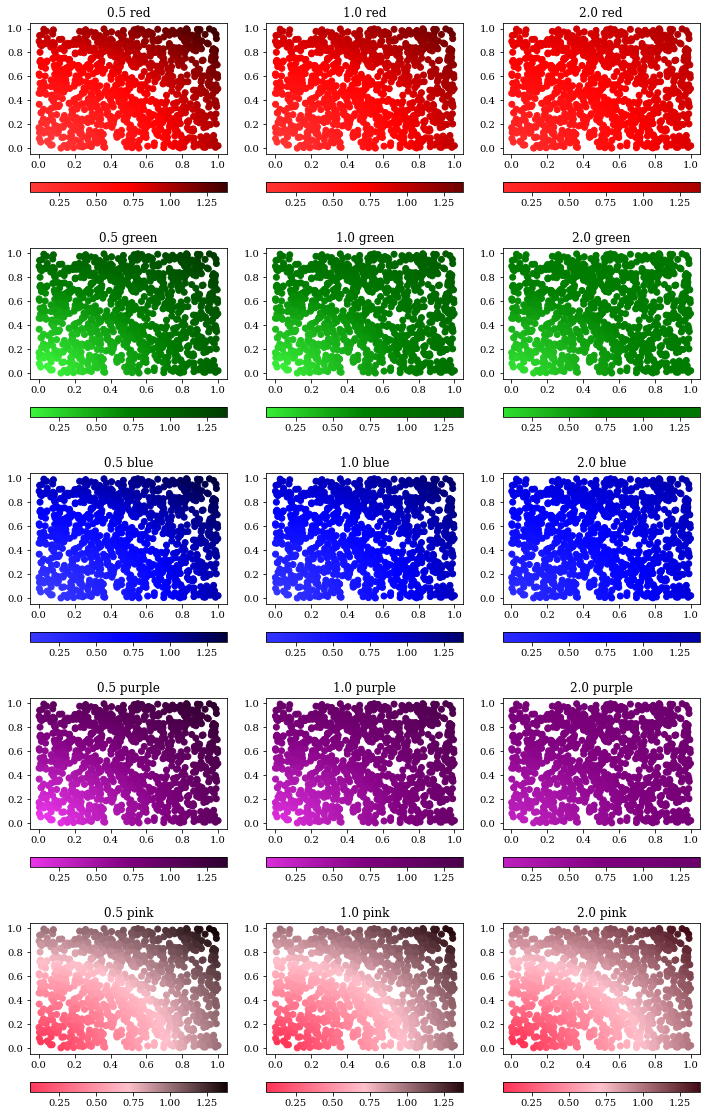

In [6]:
# def color_to_cmap(col, values=[0.2, 1.0], size=5):
#     rgb = mpl.colors.to_rgb(col)        
#     hsv = mpl.colors.rgb_to_hsv(rgb)

#     my_colors = np.ones((size, 3)) * np.asarray(hsv)[np.newaxis, :]
    
#     vv = 2
#     val = hsv[vv]
#     values[0] = np.min([values[0], val])
#     values[1] = np.max([values[1], val])
#     my_colors[:, vv] = np.interp(np.linspace(0.0, 1.0, size), [0.0, 1.0], values)    
        
#     my_colors = mpl.colors.hsv_to_rgb(my_colors)
#     cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", my_colors)
#     return cmap


def inc_sat(col, fac=0.5):
    rgb = mpl.colors.to_rgb(col)
    hsv = mpl.colors.rgb_to_hsv(rgb)
    hsv[1] = np.interp(fac, [0.0, 1.0], [hsv[1], 1.0])
    return mpl.colors.hsv_to_rgb(hsv)
    

def color_to_cmap(col, values=[0.5, 0.5], size=5, pow=1, sat=0.75):
    rgb = mpl.colors.to_rgb(col)        
    # lo = mpl.colors.to_rgb('white')
    # hi = mpl.colors.to_rgb('black')
    dw = np.linalg.norm(np.diff(np.vstack([rgb, np.ones_like(rgb)]), axis=0)) / np.sqrt(3)
    db = np.linalg.norm(np.diff(np.vstack([rgb, np.zeros_like(rgb)]), axis=0)) / np.sqrt(3)
    # print(f"{dw=}, {db=}")
    values = np.array([dw, db])**pow
    lo = [np.interp(values[0], [0.0, 1.0], [ll, 1.0]) for ll in rgb]
    hi = [np.interp(values[1], [0.0, 1.0], [ll, 0.0]) for ll in rgb]
    lo = inc_sat(lo, sat)
    hi = inc_sat(hi, sat)
    my_colors = [lo, rgb, hi]
    # print(my_colors)
    cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", my_colors)
    return cmap

# data = np.random.normal(size=(2, 1000))
data = np.random.uniform(size=(2, 1000))

val = np.linalg.norm(data, axis=0)



powers = [0.5, 1.0, 2.0]
ax = plt.gca()
# names = [ax._get_lines.get_next_color() for ii in range(5)]
names = ['red', 'green', 'blue', 'purple', 'pink']
plt.close('all')
fig, axes = plt.subplots(figsize=[4*len(powers), 4*len(names)],
                         ncols=len(powers), nrows=len(names), squeeze=False)
for (ii, jj), ax in np.ndenumerate(axes):
    col = names[ii]
    pow = powers[jj]
    print(ii, jj, col, pow, mpl.colors.rgb_to_hsv(mpl.colors.to_rgb(col)))
    cmap = color_to_cmap(col, values=[0.8, 0.1], pow=pow)
    smap = mpl.cm.ScalarMappable(cmap=cmap)
    colors = smap.to_rgba(val)

    ax.set_title(str(pow) + " " + str(col))
    ax.scatter(*data, color=colors)
    plt.colorbar(smap, ax=ax, orientation='horizontal')

plt.show()

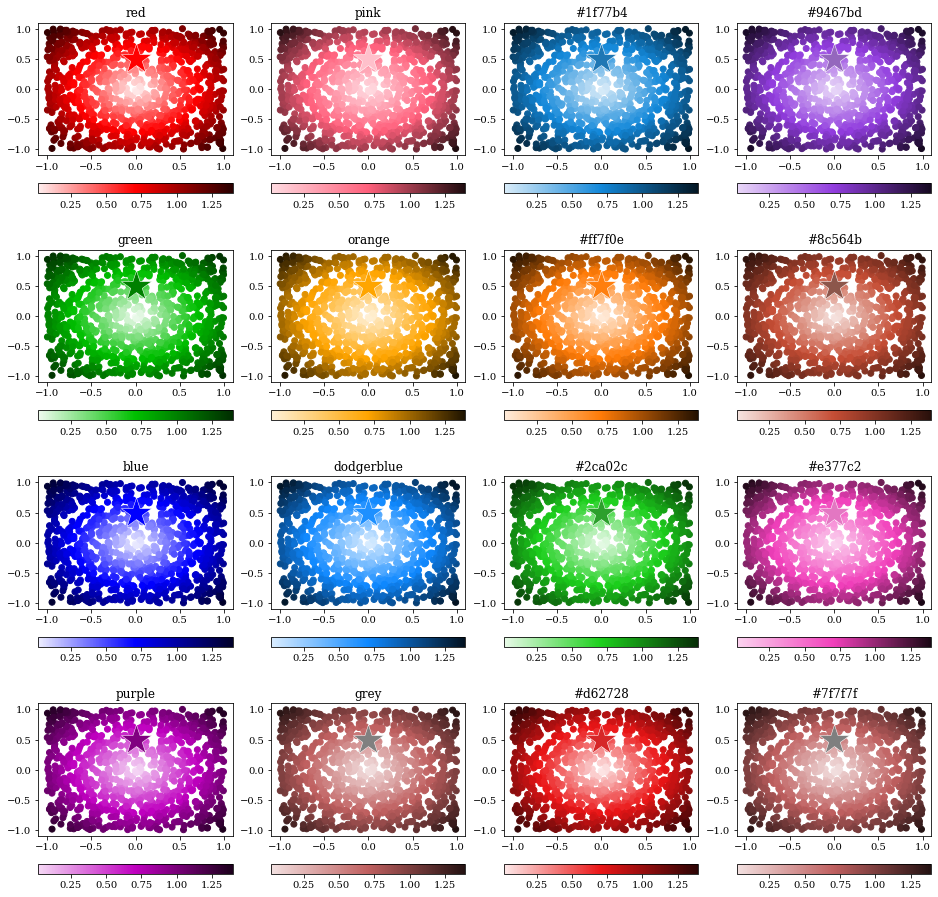

In [11]:
def color_to_cmap(col, pow=0.333, sat=0.5, val=0.5):
    rgb = mpl.colors.to_rgb(col) 

    # ---- Increase 'value' and 'saturation' of color
    # Convert to HSV
    hsv = mpl.colors.rgb_to_hsv(rgb)
    # Increase '[v]alue'
    par = 2
    hsv[par] = np.interp(val, [0.0, 1.0], [hsv[par], 1.0])
    # Increase '[s]aturation'
    par = 1
    hsv[par] = np.interp(sat, [0.0, 1.0], [hsv[par], 1.0])
    # Convert back to RGB
    rgb = mpl.colors.hsv_to_rgb(hsv)

    # ---- Create edge colors near-white and near-black
    # find distance to white and black
    dw = np.linalg.norm(np.diff(np.vstack([rgb, np.ones_like(rgb)]), axis=0)) / np.sqrt(3)
    db = np.linalg.norm(np.diff(np.vstack([rgb, np.zeros_like(rgb)]), axis=0)) / np.sqrt(3)
    # shift edges towards white and black proportionally to distance
    lo = [np.interp(dw**pow, [0.0, 1.0], [ll, 1.0]) for ll in rgb]
    hi = [np.interp(db**pow, [0.0, 1.0], [ll, 0.0]) for ll in rgb]

    # ---- Construct colormap
    my_colors = [lo, rgb, hi]
    cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", my_colors)
    return cmap

# data = np.random.normal(size=(2, 1000))
data = np.random.uniform(-1, 1, size=(2, 1000))

val = np.linalg.norm(data, axis=0)

num = 4
plt.gca()
# names = [ax._get_lines.get_next_color() for ii in range(num*num)]
names = ['red', 'green', 'blue', 'purple', 'pink', 'orange', 'dodgerblue', 'grey']
names = names + [ax._get_lines.get_next_color() for ii in range(num*num - len(names))]
# names = zplot.color_set(num*num)
plt.close('all')
fig, axes = plt.subplots(figsize=[4*num, 4*num], ncols=num, nrows=num, squeeze=False)
for (ii, jj), ax in np.ndenumerate(axes):
    col = names[ii + jj*num]
    cmap = color_to_cmap(col)
    smap = mpl.cm.ScalarMappable(cmap=cmap)
    colors = smap.to_rgba(val)

    label = col if isinstance(col, str) else mpl.colors.to_hex(col)
    ax.set_title(label)
    ax.scatter(*data, color=colors)
    ax.scatter(0.0, 0.5, fc=col, ec='white', s=1000, marker='*', lw=0.5)
    plt.colorbar(smap, ax=ax, orientation='horizontal')

plt.show()